In [2]:
'''
learning_erddap-python_dev-v3.ipynb
@author TEJ
@date 2023-02-05 thru 2023-02-15
'''
import numpy as np
import pandas as pd 
import xarray as xr
import netCDF4 as nc
import datetime as dt
from matplotlib import pyplot as plt 
import seaborn as sns
import urllib.request

from erddapClient import ERDDAP_Server
from erddapClient import ERDDAP_Tabledap

In [3]:
#retrieving all data for Coastal Endurance: Oregon Inshore Surface Piercing Profiler Mooring
remote_td = ERDDAP_Tabledap('http://erddap.dataexplorer.oceanobservatories.org/erddap','ooi-ce01issp-sp001-07-spkirj000')
responseDf = (
    remote_td.setResultVariables(['time','z','spectir_412nm','spectir_443nm','spectir_490nm','spectir_510nm','spectir_555nm','spectir_620nm', 'spectir_683nm'])
            .getDataFrame()
)
responseDf

,time (UTC),z (m),spectir_412nm (microW.cm-2.nm-1),spectir_443nm (microW.cm-2.nm-1),spectir_490nm (microW.cm-2.nm-1),spectir_510nm (microW.cm-2.nm-1),spectir_555nm (microW.cm-2.nm-1),spectir_620nm (microW.cm-2.nm-1),spectir_683nm (microW.cm-2.nm-1)
0,2014-04-17T22:28:00Z,-20.0,0.030614,0.023073,0.139625,0.220813,0.442157,-0.002197,0.005706
1,2014-04-17T22:28:00Z,-19.0,0.037231,0.030066,0.171555,0.269376,0.528362,-0.000152,0.006310
2,2014-04-17T22:28:00Z,-18.0,0.048694,0.042189,0.218303,0.344181,0.669369,0.004723,0.007052
3,2014-04-17T22:28:00Z,-17.0,0.057129,0.050411,0.250974,0.395703,0.766718,0.007724,0.007074
4,2014-04-17T22:28:00Z,-16.0,0.065813,0.059395,0.283560,0.446932,0.865479,0.013464,0.007337
...,...,...,...,...,...,...,...,...,...
49938,2022-09-27T07:53:00Z,-5.0,0.010989,-0.002785,0.010997,0.007728,-0.006375,-0.005846,0.008078
49939,2022-09-27T07:53:00Z,-4.0,0.010630,-0.002738,0.010916,0.007805,-0.006242,-0.005502,0.007749
49940,2022-09-27T07:53:00Z,-3.0,0.010466,-0.002522,0.010447,0.007654,-0.007148,-0.005562,0.007265
49941,2022-09-27T07:53:00Z,-2.0,0.010201,-0.002446,0.010259,0.007780,-0.006556,-0.005270,0.006446


In [4]:
#rewrite col names to eliminate everything after a space: the unit
responseDf.columns = responseDf.columns.str.split(' ').str[0]
responseDf.columns

Index(['time', 'z', 'spectir_412nm', 'spectir_443nm', 'spectir_490nm',
       'spectir_510nm', 'spectir_555nm', 'spectir_620nm', 'spectir_683nm'],
      dtype='object')

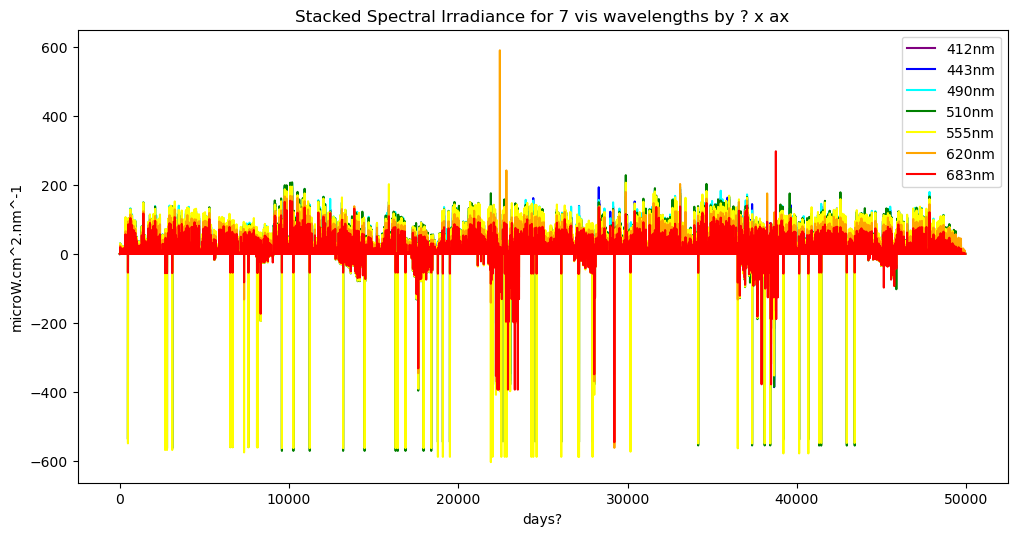

In [5]:
plt.figure(figsize=(12,6), dpi=100)
#responseDf['z (m)'].plot(label='z (m)', color='orange')
responseDf['spectir_412nm'].plot(label='412nm', color='purple')
responseDf['spectir_443nm'].plot(label='443nm', color='blue')
responseDf['spectir_490nm'].plot(label='490nm', color='cyan')
responseDf['spectir_510nm'].plot(label='510nm', color='green')
responseDf['spectir_555nm'].plot(label='555nm', color='yellow')
responseDf['spectir_620nm'].plot(label='620nm', color='orange')
responseDf['spectir_683nm'].plot(label='683nm', color='red')

plt.title('Stacked Spectral Irradiance for 7 vis wavelengths by ? x ax')
plt.xlabel("days?")
plt.ylabel("microW.cm^2.nm^-1")
plt.legend()
#plt.savefig("spec_irr_mysterious_xaxis.jpg")

Text(0.5, 1.0, 'Spectral Irradiance by Index for All Data: clearly needs filtering!')

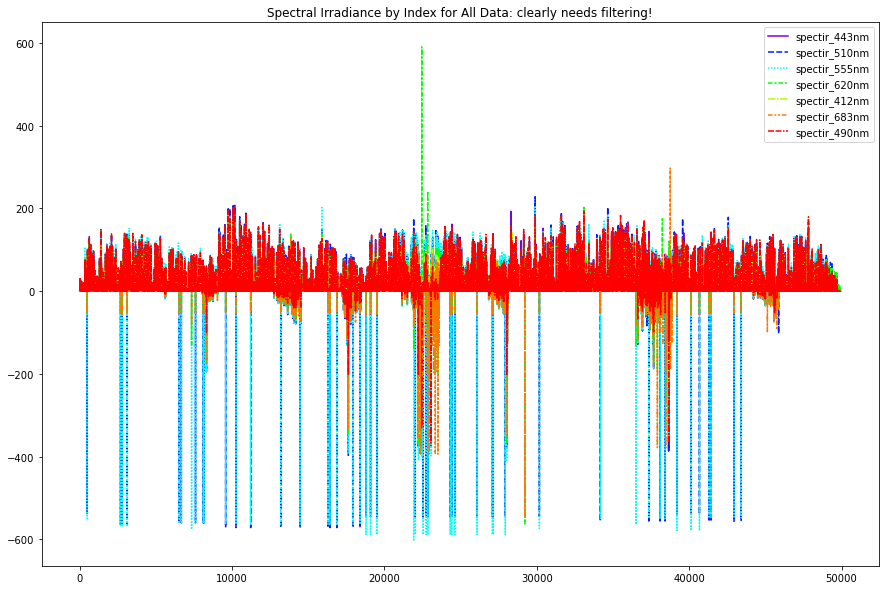

In [12]:
#another way to do this:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(data=responseDf[{"spectir_412nm","spectir_443nm","spectir_490nm","spectir_510nm","spectir_555nm","spectir_620nm","spectir_683nm"}],palette = pal)
plt.legend(facecolor='white')
plt.title("Spectral Irradiance by Index for All Data: clearly needs filtering!")

(0.0, 3000.0)

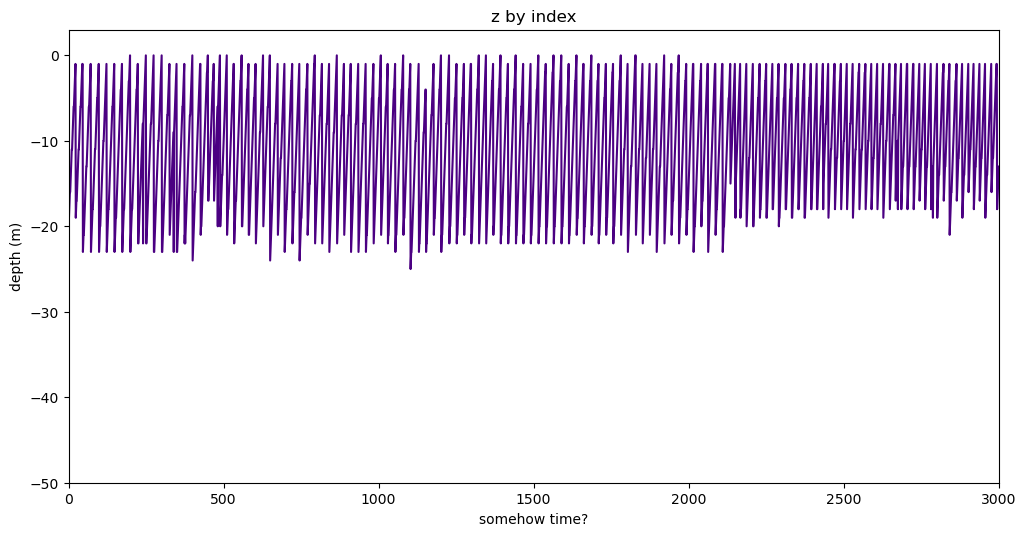

In [6]:
plt.figure(figsize=(12,6), dpi=100)
responseDf['z'].plot(label='z (m)', color='indigo')
plt.title('z by index')
plt.xlabel("somehow time?")
plt.ylabel("depth (m)")
plt.ylim((-50,3))
plt.xlim((0,3000))

#plt.savefig("z_by_index.jpg")

In [7]:
#x bounds: time
print("time min is: ",responseDf['time'].min())
print("time max is: ",responseDf['time'].max())

#y bounds: 412 to 683 nm

#z bounds: spect irr
print("dataset spectir min is: ",responseDf[['spectir_412nm','spectir_443nm','spectir_490nm','spectir_510nm','spectir_555nm','spectir_620nm','spectir_683nm']].min(axis=1).min())
print("dataset spectir max is: ",responseDf[['spectir_412nm','spectir_443nm','spectir_490nm','spectir_510nm','spectir_555nm','spectir_620nm','spectir_683nm']].max(axis=1).max())

time min is:  2014-04-17T22:28:00Z
time max is:  2022-09-27T07:53:00Z
dataset spectir min is:  -603.989492929
dataset spectir max is:  590.3492490098


In [8]:
response_small = responseDf.head(100)
response_small['time'] = pd.to_datetime(response_small['time'])
response_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   time           100 non-null    datetime64[ns, UTC]
 1   z              100 non-null    float64            
 2   spectir_412nm  100 non-null    float64            
 3   spectir_443nm  100 non-null    float64            
 4   spectir_490nm  100 non-null    float64            
 5   spectir_510nm  100 non-null    float64            
 6   spectir_555nm  100 non-null    float64            
 7   spectir_620nm  100 non-null    float64            
 8   spectir_683nm  100 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(8)
memory usage: 7.2 KB


<ipython-input-8-2224707c911f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_small['time'] = pd.to_datetime(response_small['time'])


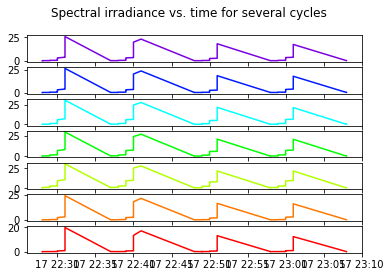

In [9]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7,sharex=True)
fig.suptitle('Spectral irradiance vs. time for several cycles')
ax1.plot(response_small["time"], response_small["spectir_412nm"],"#7b00e2")
ax2.plot(response_small["time"], response_small["spectir_443nm"],"#001bff")
ax3.plot(response_small["time"], response_small["spectir_490nm"],"#00ffff")
ax4.plot(response_small["time"], response_small["spectir_510nm"],"#00ff00")
ax5.plot(response_small["time"], response_small["spectir_555nm"],"#b3ff00")
ax6.plot(response_small["time"], response_small["spectir_620nm"],"#ff7700")
ax7.plot(response_small["time"], response_small["spectir_683nm"],"#ff0000")

the shape of this is peculiar and is not very useful qualitative data

In [10]:
#colors block
#               black    purple     blue        cyan       green    chartreuse  orange     red
#                         412       443         490         510        555       620        683
colors_black = ["00000","#7b00e2", "#001bff", "#00ffff", "#00ff00", "#b3ff00", "#ff7700", "#ff0000"]
pal_black = sns.color_palette(colors_black)

colors = ["#7b00e2", "#001bff", "#00ffff", "#00ff00", "#b3ff00", "#ff7700", "#ff0000"]
pal = sns.color_palette(colors)


colors_r = ["#ff0000", "#ff7700", "#b3ff00", "#00ff00", "#00ffff", "#001bff", "#7b00e2"]
pal_r = sns.color_palette(colors_r)

<AxesSubplot:>

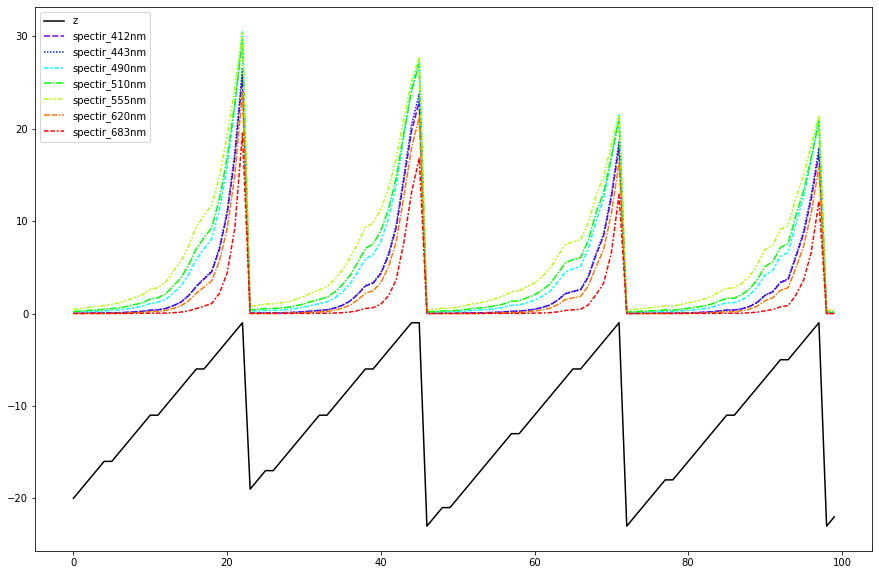

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(data=response_small,palette = pal_black)

sat feb 4: time to pivot

In [82]:
response_small.columns.tolist()[2:]
#gives 3rd + col names

response_smalong = pd.melt(response_small, id_vars=['time', 'z'], value_vars=response_small.columns.tolist()[2:],var_name='wavelength', 
                           value_name='spectir')
response_smalong
#this is my pivoted guy. 7 times as many rows. therefore pivoting the entire one will be
#50000*7 = 350,000 rows.

,time,z,wavelength,spectir
0,2014-04-17 22:28:00+00:00,-20.0,spectir_412nm,0.030614
1,2014-04-17 22:28:00+00:00,-19.0,spectir_412nm,0.037231
2,2014-04-17 22:28:00+00:00,-18.0,spectir_412nm,0.048694
3,2014-04-17 22:28:00+00:00,-17.0,spectir_412nm,0.057129
4,2014-04-17 22:28:00+00:00,-16.0,spectir_412nm,0.065813
...,...,...,...,...
695,2014-04-17 23:01:00+00:00,-3.0,spectir_683nm,3.582555
696,2014-04-17 23:01:00+00:00,-2.0,spectir_683nm,6.607488
697,2014-04-17 23:01:00+00:00,-1.0,spectir_683nm,12.139527
698,2014-04-17 23:08:00+00:00,-23.0,spectir_683nm,0.006158


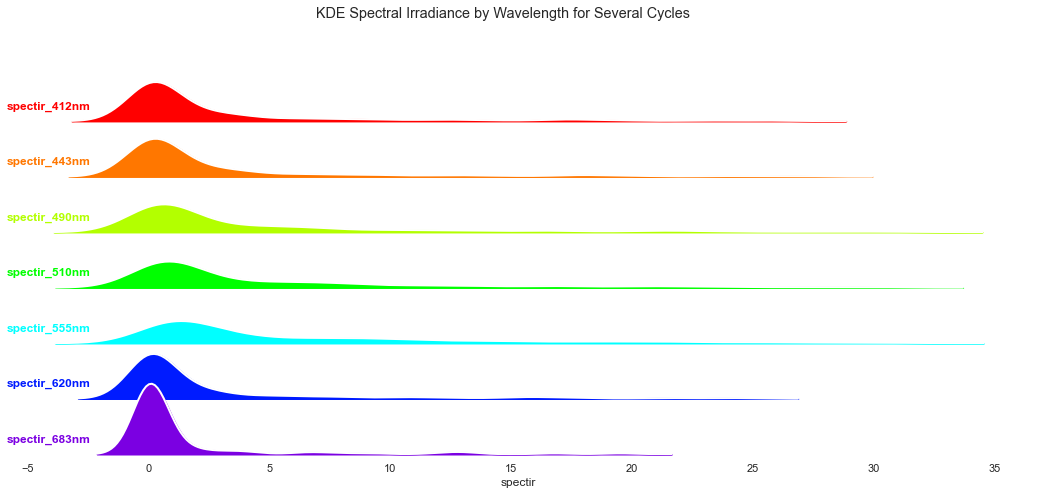

In [15]:
#trying this one wacky thing

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})



# Initialize the FacetGrid object
#see pal box

g = sns.FacetGrid(response_smalong, row="wavelength", hue="wavelength", aspect=15, height=1, palette=pal_r)

# Draw the densities in a few steps
g.map(sns.kdeplot, "spectir",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "spectir", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
#g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "spectir")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25,top=0.9)
g.fig.suptitle('KDE Spectral Irradiance by Wavelength for Several Cycles')



# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

slay!!1 ok now figuring out why max is so high. 35?

In [16]:
response_smalong["spectir"].max()
#response_smalong["spectir"].min()

30.4683087317

In [17]:
#manually select one pass/charge/deployment
one_pass = response_small[46:72]
one_pass

,time,z,spectir_412nm,spectir_443nm,spectir_490nm,spectir_510nm,spectir_555nm,spectir_620nm,spectir_683nm
46,2014-04-17 22:48:00+00:00,-23.0,0.024901,0.018159,0.125063,0.198835,0.397833,-0.005235,0.006023
47,2014-04-17 22:48:00+00:00,-22.0,0.027285,0.020323,0.137052,0.219910,0.442440,-0.004652,0.006018
48,2014-04-17 22:48:00+00:00,-21.0,0.033615,0.027464,0.175072,0.283286,0.565874,-0.001811,0.005810
49,2014-04-17 22:49:00+00:00,-21.0,0.032297,0.027380,0.174641,0.288131,0.587269,-0.002576,0.006009
50,2014-04-17 22:49:00+00:00,-20.0,0.039735,0.034329,0.209401,0.340439,0.680516,0.000049,0.006437
51,2014-04-17 22:49:00+00:00,-19.0,0.050739,0.046080,0.265911,0.431867,0.857284,0.005297,0.006301
52,2014-04-17 22:49:00+00:00,-18.0,0.066144,0.062507,0.336180,0.541895,1.061448,0.011327,0.007218
53,2014-04-17 22:49:00+00:00,-17.0,0.076920,0.073600,0.375999,0.602366,1.175055,0.017629,0.008204
54,2014-04-17 22:49:00+00:00,-16.0,0.094308,0.091596,0.438619,0.697635,1.348592,0.027623,0.009242
55,2014-04-17 22:49:00+00:00,-15.0,0.127796,0.124599,0.550029,0.861159,1.630086,0.045935,0.010875


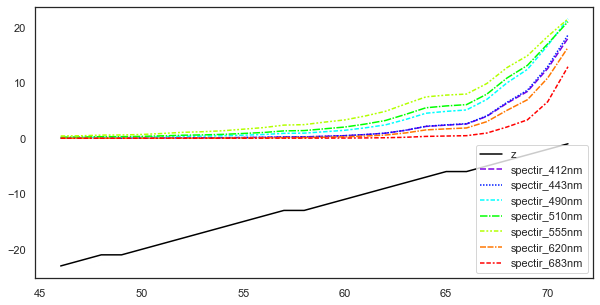

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=one_pass,palette = pal_black)
plt.legend(facecolor='white')

In [19]:
one_pass_smalong = pd.melt(one_pass, id_vars=['time', 'z'], value_vars=response_small.columns.tolist()[2:],var_name='wavelength', 
                           value_name='spectir')
one_pass_smalong

,time,z,wavelength,spectir
0,2014-04-17 22:48:00+00:00,-23.0,spectir_412nm,0.024901
1,2014-04-17 22:48:00+00:00,-22.0,spectir_412nm,0.027285
2,2014-04-17 22:48:00+00:00,-21.0,spectir_412nm,0.033615
3,2014-04-17 22:49:00+00:00,-21.0,spectir_412nm,0.032297
4,2014-04-17 22:49:00+00:00,-20.0,spectir_412nm,0.039735
...,...,...,...,...
177,2014-04-17 22:51:00+00:00,-5.0,spectir_683nm,0.935313
178,2014-04-17 22:51:00+00:00,-4.0,spectir_683nm,2.033363
179,2014-04-17 22:51:00+00:00,-3.0,spectir_683nm,3.307146
180,2014-04-17 22:51:00+00:00,-2.0,spectir_683nm,6.565675


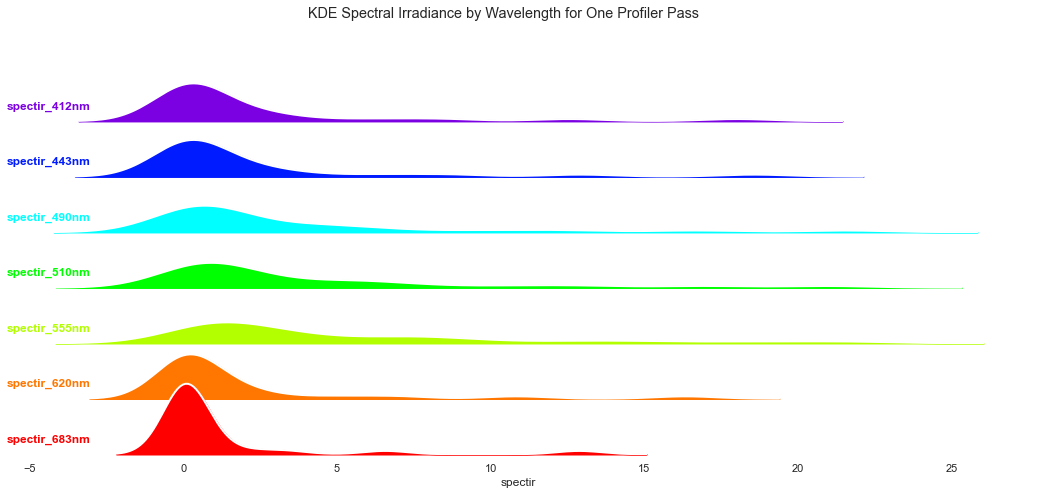

In [20]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
g = sns.FacetGrid(one_pass_smalong, row="wavelength", hue="wavelength", aspect=15, height=1, palette=pal)
g.map(sns.kdeplot, "spectir",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "spectir", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.map(label, "spectir")
g.fig.subplots_adjust(hspace=-.25,top=0.9) #THIS IS WHAT MAKES IT OVERLAP!
g.fig.suptitle('KDE Spectral Irradiance by Wavelength for One Profiler Pass')
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

In [21]:
import time #measuring response time / dev
start = time.perf_counter()
responseDf.columns.tolist()[2:]
#gives 3rd + col names

responseDf_long = pd.melt(responseDf, id_vars=['time', 'z'], value_vars=responseDf.columns.tolist()[2:],var_name='wavelength', 
                           value_name='spectir')

#responseDf_long
request_time = time.perf_counter() - start
print("response time is:",request_time, "for 350,000 rows.")


response time is: 0.04823551399999815 for 350,000 rows.


In [22]:
responseDf_long

,time,z,wavelength,spectir
0,2014-04-17T22:28:00Z,-20.0,spectir_412nm,0.030614
1,2014-04-17T22:28:00Z,-19.0,spectir_412nm,0.037231
2,2014-04-17T22:28:00Z,-18.0,spectir_412nm,0.048694
3,2014-04-17T22:28:00Z,-17.0,spectir_412nm,0.057129
4,2014-04-17T22:28:00Z,-16.0,spectir_412nm,0.065813
...,...,...,...,...
349596,2022-09-27T07:53:00Z,-5.0,spectir_683nm,0.008078
349597,2022-09-27T07:53:00Z,-4.0,spectir_683nm,0.007749
349598,2022-09-27T07:53:00Z,-3.0,spectir_683nm,0.007265
349599,2022-09-27T07:53:00Z,-2.0,spectir_683nm,0.006446


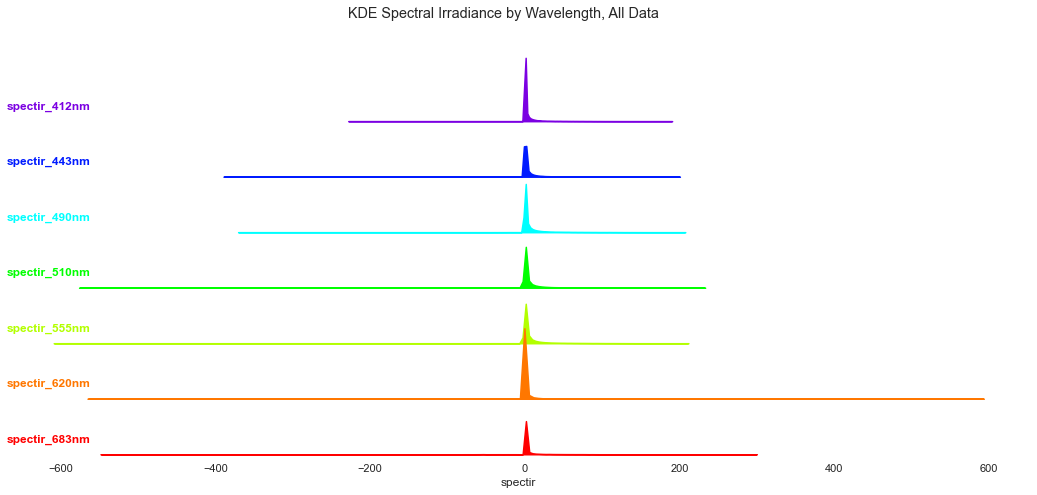

In [23]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(responseDf_long, row="wavelength", hue="wavelength", aspect=15, height=1, palette=pal)
g.map(sns.kdeplot, "spectir",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(label, "spectir")
g.fig.subplots_adjust(hspace=-.25,top=0.9)
g.fig.suptitle('KDE Spectral Irradiance by Wavelength, All Data')
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

ok now going to filter things by qc. doing this by generating link from ooi erddap website with filters already built in.

In [24]:
# let's see what qc_agg vs qc_tests is.
#using different method: url request.
save_as = "qc_test_412.csv"
download_url = "http://erddap.dataexplorer.oceanobservatories.org/erddap/tabledap/ooi-ce01issp-sp001-07-spkirj000.csv?time%2Cz%2Cspectir_412nm%2Cspectir_412nm_qc_agg%2Cspectir_412nm_qc_tests&time%3E=2022-09-24T07%3A53%3A00Z"
urllib.request.urlretrieve(download_url, save_as)

qc_df = pd.read_csv("qc_test_412.csv", dtype='unicode') 
qc_df = qc_df.drop(0)
qc_df

,time,z,spectir_412nm,spectir_412nm_qc_agg,spectir_412nm_qc_tests
1,2022-09-24T19:48:00Z,-20.0,0.0101908807,NaN,NaN
2,2022-09-24T19:49:00Z,-20.0,0.0110217111,NaN,NaN
3,2022-09-24T19:49:00Z,-19.0,0.0107561938,NaN,NaN
4,2022-09-24T19:49:00Z,-18.0,0.01015056,NaN,NaN
5,2022-09-24T19:49:00Z,-17.0,0.010153518,NaN,NaN
...,...,...,...,...,...
61,2022-09-27T07:53:00Z,-5.0,0.0109890935,NaN,NaN
62,2022-09-27T07:53:00Z,-4.0,0.0106302893,NaN,NaN
63,2022-09-27T07:53:00Z,-3.0,0.010466492,NaN,NaN
64,2022-09-27T07:53:00Z,-2.0,0.0102009981,NaN,NaN


In [27]:
print("unique values in qc_agg col:",qc_df["spectir_412nm_qc_agg"].unique())
print("unique values in qc_tests col:",qc_df["spectir_412nm_qc_tests"].unique())

unique values in qc_agg col: [nan]
unique values in qc_tests col: [nan]


ok neither of 412's qc cols are useful. now to test just the qc cols.

In [28]:
save_as = "just_qc_cols_all.csv"
download_url = "http://erddap.dataexplorer.oceanobservatories.org/erddap/tabledap/ooi-ce01issp-sp001-07-spkirj000.csv?time%2Cspectir_412nm_qc_agg%2Cspectir_412nm_qc_tests%2Cspectir_443nm_qc_agg%2Cspectir_443nm_qc_tests%2Cspectir_490nm_qc_agg%2Cspectir_490nm_qc_tests%2Cspectir_510nm_qc_agg%2Cspectir_510nm_qc_tests%2Cspectir_555nm_qc_agg%2Cspectir_555nm_qc_tests%2Cspectir_620nm_qc_agg%2Cspectir_620nm_qc_tests%2Cspectir_683nm_qc_agg%2Cspectir_683nm_qc_tests"
urllib.request.urlretrieve(download_url, save_as)

qcs = pd.read_csv("just_qc_cols_all.csv", dtype='unicode') 
qcs = qcs.drop(0)
qcs

,time,spectir_412nm_qc_agg,spectir_412nm_qc_tests,spectir_443nm_qc_agg,spectir_443nm_qc_tests,spectir_490nm_qc_agg,spectir_490nm_qc_tests,spectir_510nm_qc_agg,spectir_510nm_qc_tests,spectir_555nm_qc_agg,spectir_555nm_qc_tests,spectir_620nm_qc_agg,spectir_620nm_qc_tests,spectir_683nm_qc_agg,spectir_683nm_qc_tests
1,2014-04-17T22:28:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-04-17T22:28:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-04-17T22:28:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-04-17T22:28:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2014-04-17T22:28:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49939,2022-09-27T07:53:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49940,2022-09-27T07:53:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49941,2022-09-27T07:53:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49942,2022-09-27T07:53:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
print("unique values in 412 qc_agg col:",qcs["spectir_412nm_qc_agg"].unique())
print("unique values in 412 qc_tests col:",qcs["spectir_412nm_qc_tests"].unique())

print("unique values in 443 qc_agg col:",qcs["spectir_443nm_qc_agg"].unique())
print("unique values in 443 qc_tests col:",qcs["spectir_443nm_qc_tests"].unique())

print("unique values in 490 qc_agg col:",qcs["spectir_490nm_qc_agg"].unique())
print("unique values in 490 qc_tests col:",qcs["spectir_490nm_qc_tests"].unique())

print("unique values in 510 qc_agg col:",qcs["spectir_510nm_qc_agg"].unique())
print("unique values in 510 qc_tests col:",qcs["spectir_510nm_qc_tests"].unique())

print("unique values in 555 qc_agg col:",qcs["spectir_555nm_qc_agg"].unique())
print("unique values in 555 qc_tests col:",qcs["spectir_555nm_qc_tests"].unique())

print("unique values in 620 qc_agg col:",qcs["spectir_620nm_qc_agg"].unique())
print("unique values in 620 qc_tests col:",qcs["spectir_620nm_qc_tests"].unique())

print("unique values in 683 qc_agg col:",qcs["spectir_683nm_qc_agg"].unique())
print("unique values in 683 qc_tests col:",qcs["spectir_683nm_qc_tests"].unique())

'''
loopfy this:
wavelength_list = ["412","443","490","510","555","620","683"]
for i in wavelength list:
    
'''

unique values in 412 qc_agg col: [nan '4']
unique values in 412 qc_tests col: [nan]
unique values in 443 qc_agg col: [nan '4']
unique values in 443 qc_tests col: [nan]
unique values in 490 qc_agg col: [nan '4']
unique values in 490 qc_tests col: [nan]
unique values in 510 qc_agg col: [nan '4']
unique values in 510 qc_tests col: [nan]
unique values in 555 qc_agg col: [nan '4']
unique values in 555 qc_tests col: [nan]
unique values in 620 qc_agg col: [nan '4']
unique values in 620 qc_tests col: [nan]
unique values in 683 qc_agg col: [nan '4']
unique values in 683 qc_tests col: [nan]


'\nloopfy this:\nwavelength_list = ["412","443","490","510","555","620","683"]\nfor i in wavelength list:\n    \n'

there is only qc val 4, always in agg col. this corresponds to "FAIL"


next step: do same test for all coastal endurance profilers?

In [30]:
z_only = one_pass[one_pass.columns.tolist()[1:]]
z_only

,z,spectir_412nm,spectir_443nm,spectir_490nm,spectir_510nm,spectir_555nm,spectir_620nm,spectir_683nm
46,-23.0,0.024901,0.018159,0.125063,0.198835,0.397833,-0.005235,0.006023
47,-22.0,0.027285,0.020323,0.137052,0.219910,0.442440,-0.004652,0.006018
48,-21.0,0.033615,0.027464,0.175072,0.283286,0.565874,-0.001811,0.005810
49,-21.0,0.032297,0.027380,0.174641,0.288131,0.587269,-0.002576,0.006009
50,-20.0,0.039735,0.034329,0.209401,0.340439,0.680516,0.000049,0.006437
51,-19.0,0.050739,0.046080,0.265911,0.431867,0.857284,0.005297,0.006301
52,-18.0,0.066144,0.062507,0.336180,0.541895,1.061448,0.011327,0.007218
53,-17.0,0.076920,0.073600,0.375999,0.602366,1.175055,0.017629,0.008204
54,-16.0,0.094308,0.091596,0.438619,0.697635,1.348592,0.027623,0.009242
55,-15.0,0.127796,0.124599,0.550029,0.861159,1.630086,0.045935,0.010875


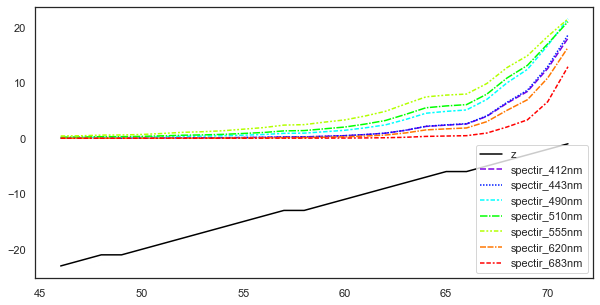

In [31]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=z_only,palette = pal_black)
plt.legend(facecolor='white')

ok it still plots this by index which has been retained so no point in subsetting data by getting rid of time. "z"

In [32]:
one_pass.columns.tolist()[1:3]

['z', 'spectir_412nm']

Text(0.5, 0, 'spectral irradiance (unit)')

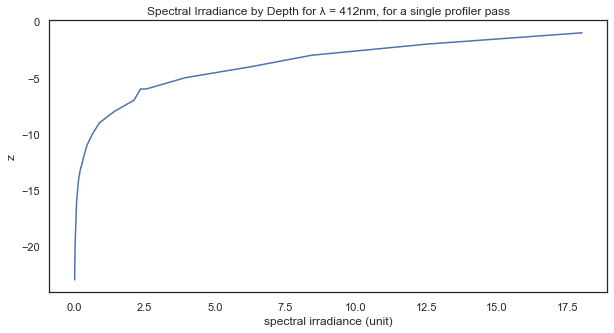

In [33]:
z_412only = one_pass[one_pass.columns.tolist()[1:3]]

fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=z_412only, x="spectir_412nm", y="z")
plt.title("Spectral Irradiance by Depth for λ = 412nm, for a single profiler pass")
plt.xlabel("spectral irradiance (unit)")
#plt.legend(facecolor='white')

this is what we want to see, now figure out how to facet wrap by column. 


In [34]:
one_pass_smalong

,time,z,wavelength,spectir
0,2014-04-17 22:48:00+00:00,-23.0,spectir_412nm,0.024901
1,2014-04-17 22:48:00+00:00,-22.0,spectir_412nm,0.027285
2,2014-04-17 22:48:00+00:00,-21.0,spectir_412nm,0.033615
3,2014-04-17 22:49:00+00:00,-21.0,spectir_412nm,0.032297
4,2014-04-17 22:49:00+00:00,-20.0,spectir_412nm,0.039735
...,...,...,...,...
177,2014-04-17 22:51:00+00:00,-5.0,spectir_683nm,0.935313
178,2014-04-17 22:51:00+00:00,-4.0,spectir_683nm,2.033363
179,2014-04-17 22:51:00+00:00,-3.0,spectir_683nm,3.307146
180,2014-04-17 22:51:00+00:00,-2.0,spectir_683nm,6.565675


In [87]:
plt.close()

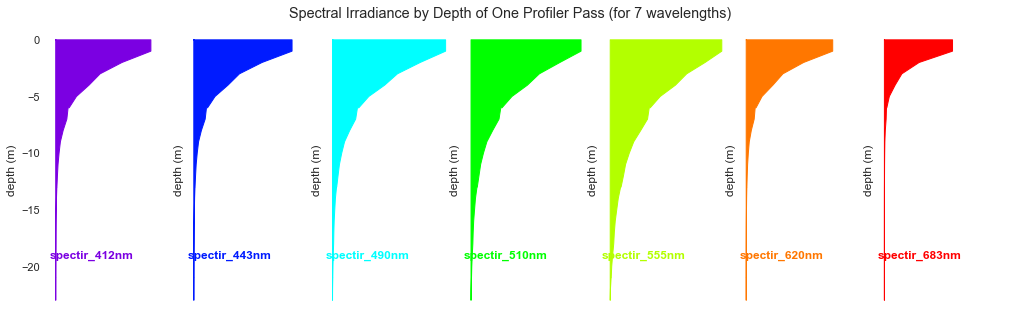

In [88]:
#sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
g = sns.FacetGrid(one_pass_smalong, col ="wavelength", hue="wavelength",  palette=pal, aspect=.4, height=5) #
#g.map(sns.lineplot, "spectir", "z")
g.map(plt.fill_between, "spectir","z")
g.map(label, "spectir")
#g.fig.subplots_adjust(wspace=-.2) #theres a weird looking flatness to the shallowest things
g.fig.suptitle('Spectral Irradiance by Depth of One Profiler Pass (for 7 wavelengths) ')
g.set_titles("")
g.set(xticks=[], xlabel="",ylabel="depth (m)")
g.despine(bottom=True, left=True)

weird artefact where it doesnt actually go to z=0, just z=-1. I like z=0 on the scale but I don't want it to fill between to 0

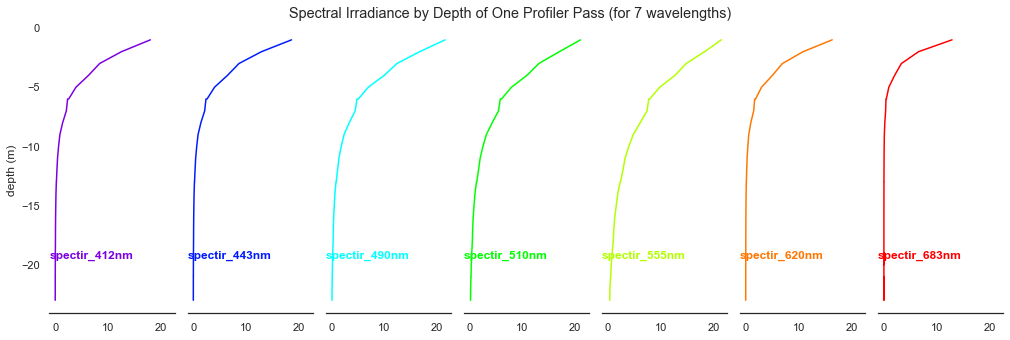

In [95]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
g = sns.FacetGrid(one_pass_smalong, col ="wavelength", hue="wavelength",  palette=pal, aspect=.4, height=5) #
g.map(sns.lineplot, "spectir", "z")
#g.map(plt.fill_between, "spectir","z")
g.map(label, "spectir")
#g.fig.subplots_adjust(wspace=-.2) #theres a weird looking flatness to the shallowest things
g.fig.suptitle('Spectral Irradiance by Depth of One Profiler Pass (for 7 wavelengths) ')
g.set_titles("")
g.set(ylabel="depth (m)")
g.set(xlabel="")
g.despine( left=True)

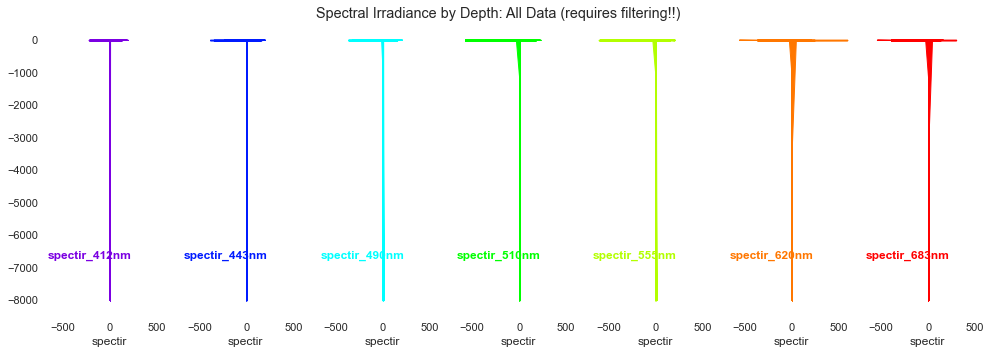

In [37]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
g = sns.FacetGrid(responseDf_long, col ="wavelength", hue="wavelength",  palette=pal, aspect=.4, height=5) #
#g.map(sns.lineplot, "spectir", "z")
g.map(plt.fill_between, "spectir","z")
g.map(label, "spectir")
#g.fig.subplots_adjust(wspace=-.2) #theres a weird looking flatness to the shallowest things
g.fig.suptitle('Spectral Irradiance by Depth: All Data (requires filtering!!)')
g.set_titles("")
#g.set(xticks=[], xlabel="")
g.despine(bottom=True, left=True)
#g.set(ylabel="depth (m)") #leaving this off bc it currenly labels all 7 plots.

ok this is exactly what we want! now to filter out faulty data for depths and spectir.

In [38]:
#establishing comparison
responseDf_long

,time,z,wavelength,spectir
0,2014-04-17T22:28:00Z,-20.0,spectir_412nm,0.030614
1,2014-04-17T22:28:00Z,-19.0,spectir_412nm,0.037231
2,2014-04-17T22:28:00Z,-18.0,spectir_412nm,0.048694
3,2014-04-17T22:28:00Z,-17.0,spectir_412nm,0.057129
4,2014-04-17T22:28:00Z,-16.0,spectir_412nm,0.065813
...,...,...,...,...
349596,2022-09-27T07:53:00Z,-5.0,spectir_683nm,0.008078
349597,2022-09-27T07:53:00Z,-4.0,spectir_683nm,0.007749
349598,2022-09-27T07:53:00Z,-3.0,spectir_683nm,0.007265
349599,2022-09-27T07:53:00Z,-2.0,spectir_683nm,0.006446


In [39]:
# first use pandas dropna() to drop rows with any NaNs
filtered_responseDf_long=responseDf_long.dropna(subset=['z','spectir']).reset_index(drop=True)
filtered_responseDf_long
#turns out there are frickin none. now get rid of conditions

,time,z,wavelength,spectir
0,2014-04-17T22:28:00Z,-20.0,spectir_412nm,0.030614
1,2014-04-17T22:28:00Z,-19.0,spectir_412nm,0.037231
2,2014-04-17T22:28:00Z,-18.0,spectir_412nm,0.048694
3,2014-04-17T22:28:00Z,-17.0,spectir_412nm,0.057129
4,2014-04-17T22:28:00Z,-16.0,spectir_412nm,0.065813
...,...,...,...,...
349596,2022-09-27T07:53:00Z,-5.0,spectir_683nm,0.008078
349597,2022-09-27T07:53:00Z,-4.0,spectir_683nm,0.007749
349598,2022-09-27T07:53:00Z,-3.0,spectir_683nm,0.007265
349599,2022-09-27T07:53:00Z,-2.0,spectir_683nm,0.006446


In [40]:
filtered_responseDf_long = responseDf_long[
                            (responseDf_long["z"] >= -30) & #condit 1
                            (responseDf_long["spectir"] > 0)].reset_index(drop=True) #condit 2 and resetting index using method

filtered_responseDf_long.head(100)

,time,z,wavelength,spectir
0,2014-04-17T22:28:00Z,-20.0,spectir_412nm,0.030614
1,2014-04-17T22:28:00Z,-19.0,spectir_412nm,0.037231
2,2014-04-17T22:28:00Z,-18.0,spectir_412nm,0.048694
3,2014-04-17T22:28:00Z,-17.0,spectir_412nm,0.057129
4,2014-04-17T22:28:00Z,-16.0,spectir_412nm,0.065813
...,...,...,...,...
95,2014-04-17T23:01:00Z,-3.0,spectir_412nm,8.599717
96,2014-04-17T23:01:00Z,-2.0,spectir_412nm,12.345873
97,2014-04-17T23:01:00Z,-1.0,spectir_412nm,17.270360
98,2014-04-17T23:08:00Z,-23.0,spectir_412nm,0.021252


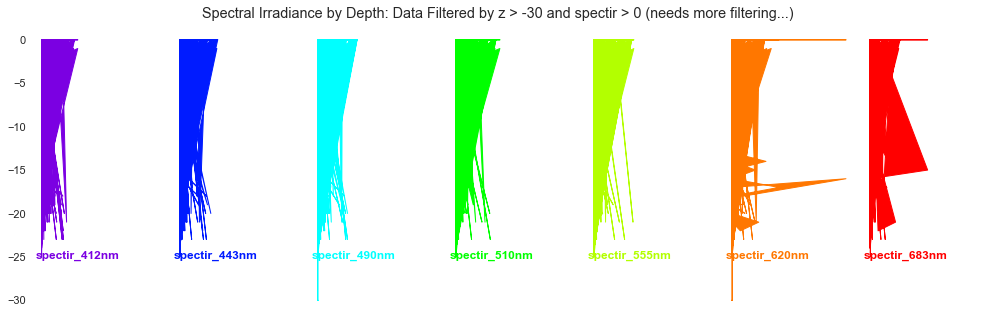

In [41]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
g = sns.FacetGrid(filtered_responseDf_long, col ="wavelength", hue="wavelength",  palette=pal, aspect=.4, height=5) #
#g.map(sns.lineplot, "spectir", "z")
g.map(plt.fill_between, "spectir","z")
g.map(label, "spectir")
#g.fig.subplots_adjust(wspace=-.2) #theres a weird looking flatness to the shallowest things
g.fig.suptitle('Spectral Irradiance by Depth: Data Filtered by z > -30 and spectir > 0 (needs more filtering...)')
g.set_titles("")
g.set(xticks=[], xlabel="")
g.despine(bottom=True, left=True)
#g.set(ylabel="depth (m)") #leaving this off bc it currenly labels all 7 plots.

count how many passes in a given df: does it get to 1 every single time? it does not get to max depth every single time. question for chris: experimental design.

# making bar plots

In [42]:
responseDf

,time,z,spectir_412nm,spectir_443nm,spectir_490nm,spectir_510nm,spectir_555nm,spectir_620nm,spectir_683nm
0,2014-04-17T22:28:00Z,-20.0,0.030614,0.023073,0.139625,0.220813,0.442157,-0.002197,0.005706
1,2014-04-17T22:28:00Z,-19.0,0.037231,0.030066,0.171555,0.269376,0.528362,-0.000152,0.006310
2,2014-04-17T22:28:00Z,-18.0,0.048694,0.042189,0.218303,0.344181,0.669369,0.004723,0.007052
3,2014-04-17T22:28:00Z,-17.0,0.057129,0.050411,0.250974,0.395703,0.766718,0.007724,0.007074
4,2014-04-17T22:28:00Z,-16.0,0.065813,0.059395,0.283560,0.446932,0.865479,0.013464,0.007337
...,...,...,...,...,...,...,...,...,...
49938,2022-09-27T07:53:00Z,-5.0,0.010989,-0.002785,0.010997,0.007728,-0.006375,-0.005846,0.008078
49939,2022-09-27T07:53:00Z,-4.0,0.010630,-0.002738,0.010916,0.007805,-0.006242,-0.005502,0.007749
49940,2022-09-27T07:53:00Z,-3.0,0.010466,-0.002522,0.010447,0.007654,-0.007148,-0.005562,0.007265
49941,2022-09-27T07:53:00Z,-2.0,0.010201,-0.002446,0.010259,0.007780,-0.006556,-0.005270,0.006446


In [43]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [44]:
#x axis vars
vars_list = responseDf.columns.tolist()[2:]
vars_list

['spectir_412nm',
 'spectir_443nm',
 'spectir_490nm',
 'spectir_510nm',
 'spectir_555nm',
 'spectir_620nm',
 'spectir_683nm']

In [45]:
#y axis vals
#this theoretically varies
vals_list = responseDf.loc[45].values.flatten().tolist()[2:]
vals_list
z = responseDf.loc[45].values.flatten()[1]

Text(0, 0.5, 'spectral irradiance (unit)')

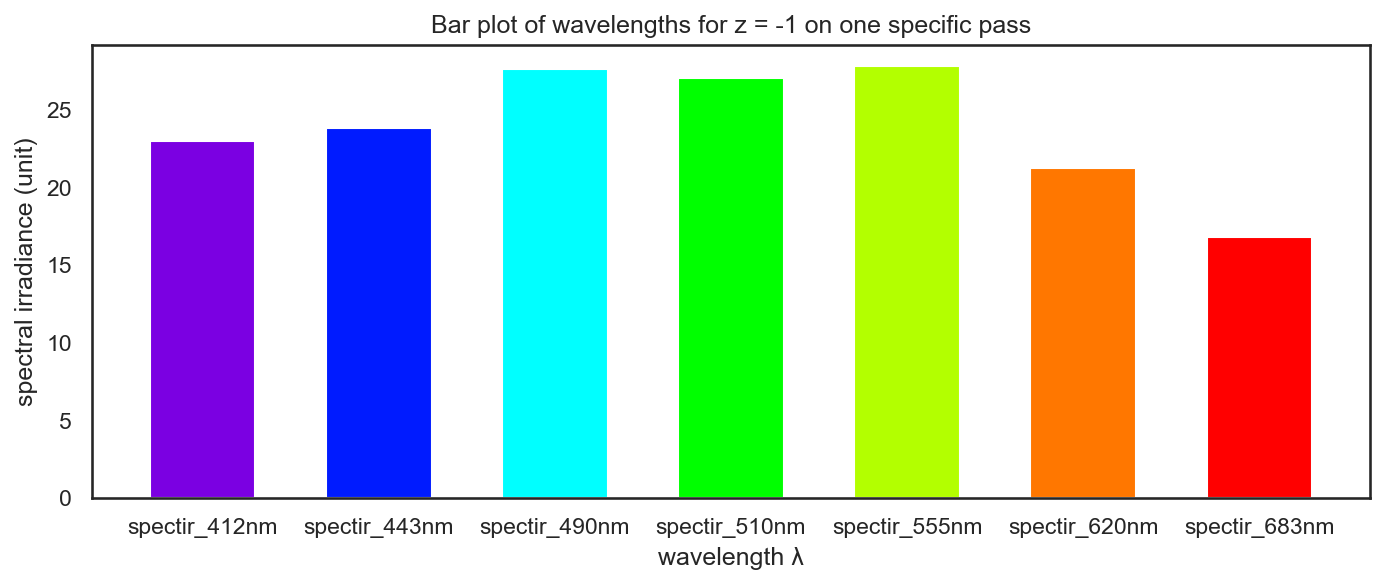

In [46]:
plt.figure(figsize=(11,4), dpi=150)
plt.bar(vars_list, 
        vals_list,
        width=.6,
        color=colors)
plt.title("Bar plot of wavelengths for z = -1 on one specific pass")
plt.xlabel("wavelength λ")
plt.ylabel("spectral irradiance (unit)")

In [49]:
wavelengthnm_list = ["spectir_412nm","spectir_443nm","spectir_490nm","spectir_510nm","spectir_555nm","spectir_620nm","spectir_683nm"]
wavelength_list = ["412","443","490","510","555","620","683"]

In [50]:
#given a df and an index:

def barplot_maker_index(df,index):
    vars_list = wavelengthnm_list #df.columns.tolist()[2:] #pulls names of spectir cols into list
    vals_list = df.loc[index].values.flatten().tolist()[2:] #for an index of the df, pulls values of spectir cols into list
    z = responseDf.loc[index].values.flatten()[1] #pulls out z value for given index
    plt.figure(figsize=(11,4), dpi=150)
    plt.bar(vars_list, 
            vals_list,
            width=.7,
            color=colors)
    plt.title("Bar plot of wavelengths for z = {} on one specific pass".format(z))
    plt.xlabel("wavelength λ")
    plt.ylabel("spectral irradiance (unit)")
    plt.show()

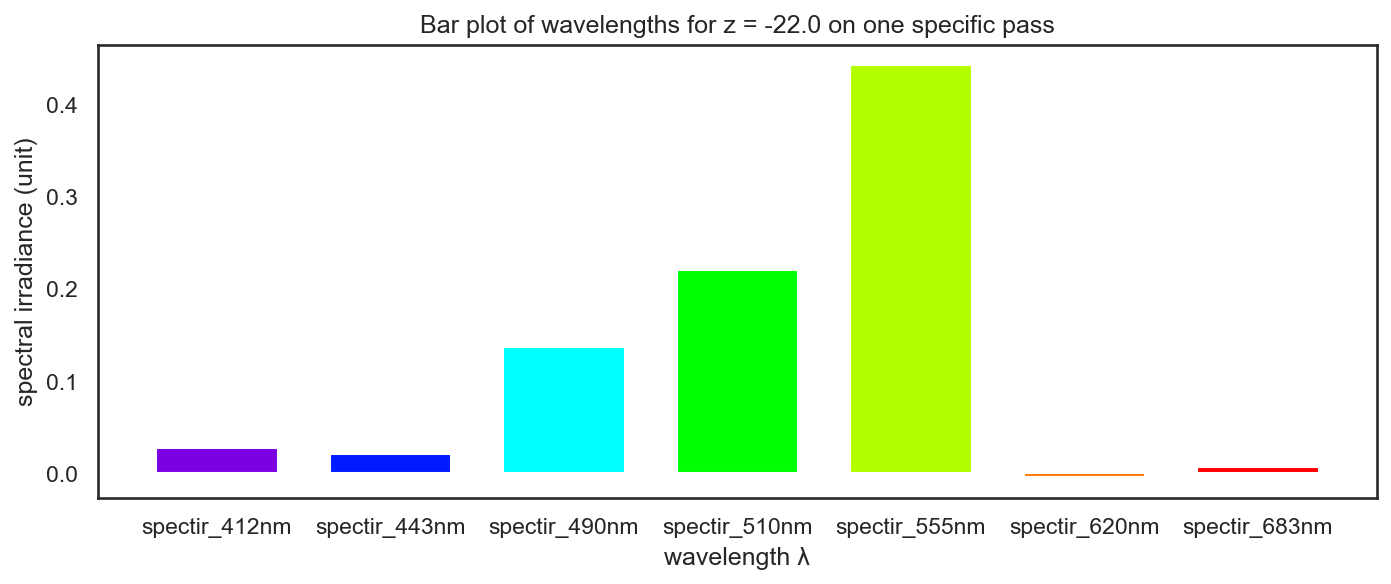

In [51]:
barplot_maker_index(responseDf,47)

# making depthwise avg list for given df

In [52]:
response_small

,time,z,spectir_412nm,spectir_443nm,spectir_490nm,spectir_510nm,spectir_555nm,spectir_620nm,spectir_683nm
0,2014-04-17 22:28:00+00:00,-20.0,0.030614,0.023073,0.139625,0.220813,0.442157,-0.002197,0.005706
1,2014-04-17 22:28:00+00:00,-19.0,0.037231,0.030066,0.171555,0.269376,0.528362,-0.000152,0.006310
2,2014-04-17 22:28:00+00:00,-18.0,0.048694,0.042189,0.218303,0.344181,0.669369,0.004723,0.007052
3,2014-04-17 22:28:00+00:00,-17.0,0.057129,0.050411,0.250974,0.395703,0.766718,0.007724,0.007074
4,2014-04-17 22:28:00+00:00,-16.0,0.065813,0.059395,0.283560,0.446932,0.865479,0.013464,0.007337
...,...,...,...,...,...,...,...,...,...
95,2014-04-17 23:01:00+00:00,-3.0,8.599717,8.857267,12.579870,13.270859,14.990203,7.246668,3.582555
96,2014-04-17 23:01:00+00:00,-2.0,12.345873,12.763302,16.544596,16.866558,18.231743,10.846807,6.607488
97,2014-04-17 23:01:00+00:00,-1.0,17.270360,17.934012,21.126544,20.782391,21.453608,15.851361,12.139527
98,2014-04-17 23:08:00+00:00,-23.0,0.021252,0.012929,0.094217,0.150298,0.326444,-0.004977,0.006158


In [53]:
def mean_wavelengths(df,z):
    mean_list = []
    error_list = []
    for i in wavelengthnm_list:
        lam = df.query('z=={}'.format(z))[i].mean()
        mean_list.append(lam)
        
        sig = np.std(df.query('z=={}'.format(z))[i].to_list())
        error_list.append(sig)
        

    return mean_list, error_list
    
def mean_lams_barplot_maker(df,z):
    mean_list = []
    error_list = []
    for i in wavelengthnm_list:
        lam = df.query('z=={}'.format(z))[i].mean()
        mean_list.append(lam)
        sig = np.std(df.query('z=={}'.format(z))[i].to_list())
        error_list.append(sig)
        
    plt.figure(figsize=(11,4), dpi=150)
    plt.bar(wavelengthnm_list, 
            mean_list,
            yerr = error_list,
            width=.7,
            color=colors,
            align='center', ecolor='black', capsize=5)
    plt.title("Bar plot of mean wavelengths for z = {}".format(z))
    plt.xlabel("wavelength λ")
    plt.ylabel("spectral irradiance (microW.cm^2.nm^-1)")
    plt.ylim(-15,75)
    plt.show()

In [54]:
meanlist,errorlist=mean_wavelengths(response_small,-3)
meanlist
errorlist

[0.9060213219840283,
 0.9338417912472718,
 1.3735169542571697,
 1.480501823524851,
 1.7570228478295995,
 0.8394979146032214,
 0.386981772678139]

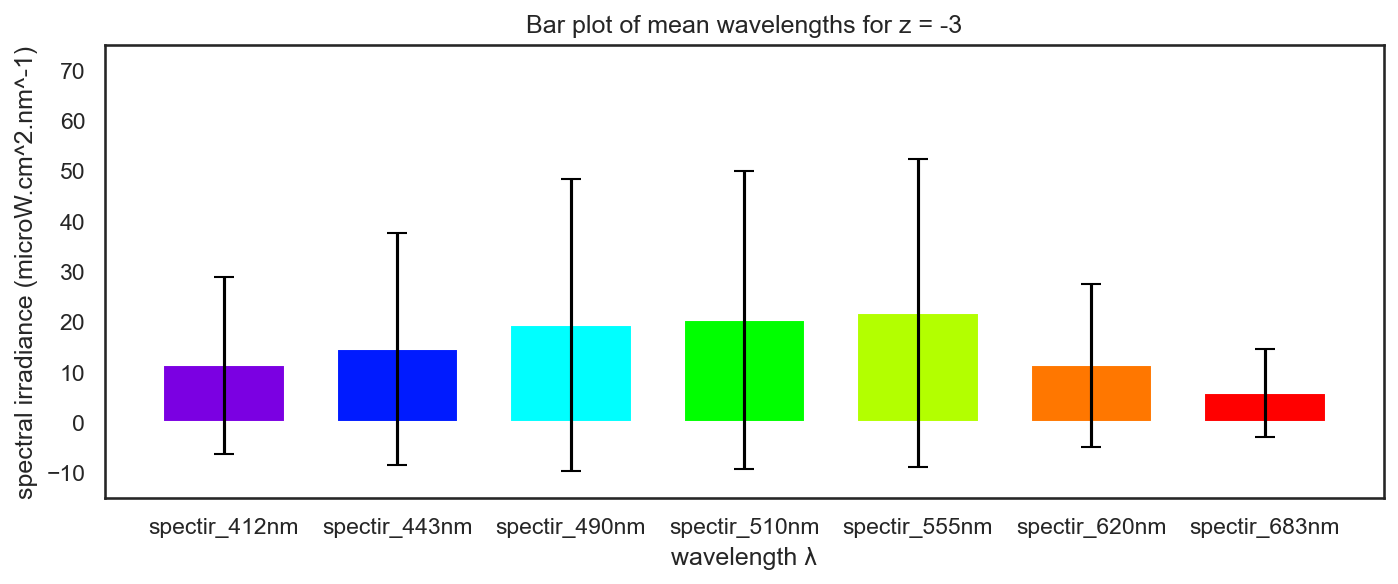

In [60]:
mean_lams_barplot_maker(responseDf,-3)

# this could be better. lets see if we can make a plt boxplot
https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/

numpy uses list of lists. this suits us.

In [122]:
def whiskerplot_maker(df,z):
    data = []
    for i in wavelengthnm_list:
        z_list = df.query('z=={}'.format(z))[i].to_list()
        data.append(z_list)

    
    fig = plt.figure(figsize =(11, 4),dpi=150)
    ax = fig.add_axes([0, 0, 1, 1])
    bp = ax.boxplot(data, patch_artist=True)
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

   

    plt.title("Box & Whisker plot of mean wavelengths for z = {}".format(z))
    plt.xlabel("wavelength λ")
    plt.ylabel("spectral irradiance (microW.cm^2.nm^-1)")
    ax.yaxis.grid(True)
    #set ylim according to max setwise value for visual comparison? 
    #plt.ylim(-1,60)
    #plt.show()

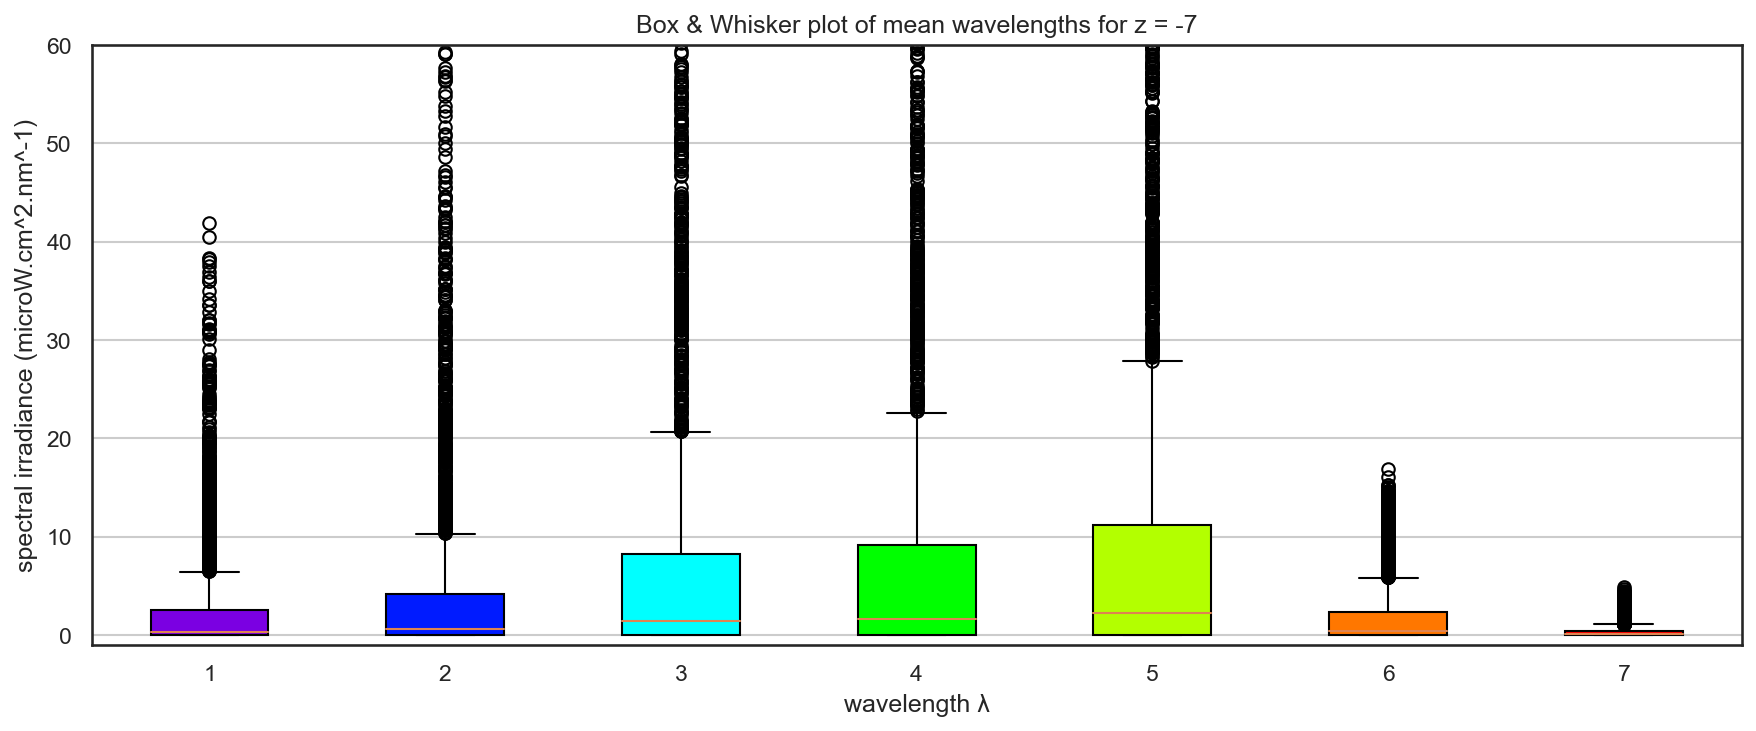

In [81]:
whiskerplot_maker(responseDf,-7)

https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html 
    
    get xlabels right? try using df.plot instead of plt.boxplot()

In [65]:
#nc
def mean_lams_whiskerplot_maker2(df,z):
    #not complete. data looks funky for this. 
    data = []
    for i in wavelengthnm_list:
        z_list = df.query('z=={}'.format(z))[i].to_list()
        data.append(z_list)
        print(data)
        
    dataF = pd.DataFrame(data,columns = wavelengthnm_list)
    fig = plt.figure(figsize =(11, 4),dpi=150)
    dataF.plot(kind='box',palette=colors)
    
    
    
   

    plt.title("Box & Whisker plot of mean wavelengths for z = {}".format(z))
    plt.xlabel("wavelength λ")
    plt.ylabel("spectral irradiance (microW.cm^2.nm^-1)")
    ax.yaxis.grid(True)
    #set ylim according to max setwise value for visual comparison? 
    plt.show()

In [125]:
#mean_lams_whiskerplot_maker2(responseDf,-4)

In [131]:
filtered_responseDf = responseDf[
                            (responseDf["z"] >= -33) & #condit 1
                            (responseDf["spectir_412nm"] > 0) &
                            (responseDf["spectir_443nm"] > 0) &
                            (responseDf["spectir_490nm"] > 0) &
                            (responseDf["spectir_510nm"] > 0) &
                            (responseDf["spectir_555nm"] > 0) &
                            (responseDf["spectir_620nm"] > 0) &
                            (responseDf["spectir_683nm"] > 0)].reset_index(drop=True) #condit 2 and resetting index using method

filtered_responseDf

,time,z,spectir_412nm,spectir_443nm,spectir_490nm,spectir_510nm,spectir_555nm,spectir_620nm,spectir_683nm
0,2014-04-17T22:28:00Z,-18.0,0.048694,0.042189,0.218303,0.344181,0.669369,0.004723,0.007052
1,2014-04-17T22:28:00Z,-17.0,0.057129,0.050411,0.250974,0.395703,0.766718,0.007724,0.007074
2,2014-04-17T22:28:00Z,-16.0,0.065813,0.059395,0.283560,0.446932,0.865479,0.013464,0.007337
3,2014-04-17T22:29:00Z,-16.0,0.082575,0.076288,0.342218,0.534411,1.012869,0.022377,0.007749
4,2014-04-17T22:29:00Z,-15.0,0.094298,0.088290,0.386897,0.603837,1.145983,0.029282,0.008443
...,...,...,...,...,...,...,...,...,...
25309,2022-09-24T19:50:00Z,-5.0,0.026121,0.026678,0.089246,0.408122,1.112562,1.731183,0.135638
25310,2022-09-24T19:50:00Z,-4.0,0.038530,0.045739,0.114363,0.551325,1.426770,2.738824,0.255545
25311,2022-09-24T19:50:00Z,-3.0,0.057027,0.073567,0.151391,0.737895,1.865766,4.482135,0.523181
25312,2022-09-24T19:50:00Z,-2.0,0.089921,0.114383,0.220557,0.969997,2.326666,7.342328,1.097254


In [144]:
#depths = list(responseDf['z'].unique())
depths = list(range(-33,1))
depths.sort(reverse=True)
print(depths)

[0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31, -32, -33]


In [145]:
#nc
# make aniamtion with https://towardsdatascience.com/basics-of-gifs-with-pythons-matplotlib-54dd544b6f30

# and    whiskerplot_maker(df,z)

import imageio
import os

filenames = []

for i in range(len(depths)):
    print(str(depths[i]))
    #way to do this with existing func? how to store files/filename list?
    
    whiskerplot_maker(filtered_responseDf,depths[i])
    
    # create file name and append it to a list
    filename = 'depth_animation{}.png'.format(str(int(depths[i])))
    filenames.append(filename)
    
    # save frame
    plt.savefig(filename,bbox_inches='tight')
    plt.close()
    
# build gif
with imageio.get_writer('or_inshore_whiskerplot_fixed_ax_filtered.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files

for filename in set(filenames):
    os.remove(filename)

0
-1
-2
-3
-4
-5
-6
-7
-8
-9
-10
-11
-12
-13
-14
-15
-16
-17
-18
-19
-20
-21
-22
-23
-24
-25
-26
-27
-28
-29
-30
-31
-32
-33
